In [18]:
# import os
# import pandas as pd
# import cv2

# # Load the CSV file into a DataFrame
# csv_file = 'dataset/fix-data_CSV.csv'  # Replace with the path to your CSV file
# df = pd.read_csv(csv_file)

# # Define the prefix you want to add to the directory paths
# prefix = 'dataset/18aug-fix-dataset/'  # Replace with the desired prefix

# # Iterate through the DataFrame rows
# for index, row in df.iterrows():
#     # directory_path = prefix + row['Path']  # Replace 'Directory' with the actual column name
#     directory_path = prefix + row['Path'].replace('\\', '/')  # Replace backslashes with forward slashes
#     filename = row['Filename']  # Replace 'Filename' with the actual column name
    
#     # Construct the full path to the image
#     image_path = os.path.join(directory_path, filename)
#     image_path = image_path.replace('\\','/')
    
#     # print(image_path)

#     # Load and display the image
#     image = cv2.imread(image_path)
#     cv2.imshow('Image', image)
    
#     # Wait for a key press (or you can set a timer for automatic closing)
#     cv2.waitKey(0)
    
#     # Close the image window
#     cv2.destroyAllWindows()

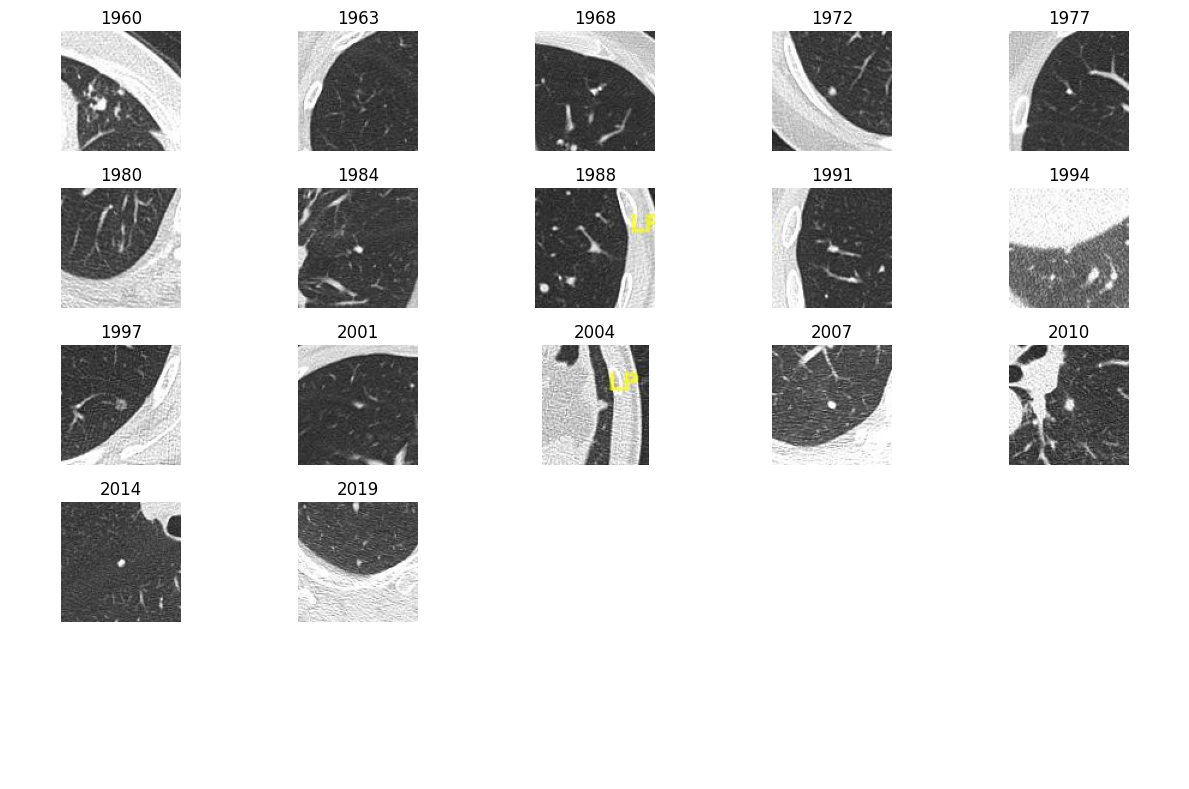

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2

# Load the CSV file into a DataFrame
csv_file = 'dataset/testing.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file)

# Define the prefix you want to add to the directory paths
prefix = 'dataset/18aug-fix-dataset/'  # Replace with the desired prefix

# # Define the number of rows and columns in the grid
# num_rows = 2  # Change as needed
# num_cols = 3  # Change as needed

# # Calculate the total number of subplots
# num_subplots = num_rows * num_cols

# # Create a figure and a set of subplots
# fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# # Iterate through the DataFrame and display images in subplots
# for i, row in df.iterrows():
#     if i >= num_subplots:
#         break
    
#     directory_path = prefix + row['Path']  # Replace 'Directory' with the actual column name
#     filename = row['Filename']  # Replace 'Filename' with the actual column name
    
#     # Construct the full path to the image
#     image_path = directory_path + '/' + filename
    
#     # Load and display the image in the current subplot
#     img = imread(image_path)
#     ax = axs[i // num_cols, i % num_cols]
#     ax.imshow(img)
#     ax.set_title(f'Image {i+1}')
#     ax.axis('off')  # Turn off axis labels

# # Hide any remaining empty subplots
# for i in range(len(df), num_subplots):
#     ax = axs[i // num_cols, i % num_cols]
#     ax.axis('off')

# # Adjust spacing between subplots
# plt.tight_layout()

# # Show the plot
# plt.show()

# Define the X and Y columns to select
x_column = 'X'  # Replace with the actual 'X' column name
y_column = 'Y'  # Replace with the actual 'Y' column name

# Define the cropping dimensions (adjust these as needed)
crop_width = 100  # Width of the cropped region
crop_height = 100  # Height of the cropped region

# Define the number of rows and columns in the grid
num_rows = 5  # Change as needed
num_cols = 5  # Change as needed

# Calculate the total number of subplots
num_subplots = num_rows * num_cols

# Create a figure and a set of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Iterate through the DataFrame and display cropped images in subplots
for i, row in df.iterrows():
    if i >= num_subplots:
        break
    
    directory_path = prefix + row['Path']  # Replace 'Directory' with the actual column name
    filename = row['Filename']  # Replace 'Filename' with the actual column name
    center_x = int(row[x_column])  # Convert center X coordinate to an integer
    center_y = int(row[y_column])  # Convert center Y coordinate to an integer
    
    # Construct the full path to the image
    image_path = directory_path + '/' + filename
    
    # Load the image
    img = cv2.imread(image_path)
    
    # Calculate the cropping region coordinates
    x1 = center_x - crop_width // 2
    x2 = center_x + crop_width // 2
    y1 = center_y - crop_height // 2
    y2 = center_y + crop_height // 2
    
    # Crop the image based on the calculated coordinates
    cropped_img = img[y1:y2, x1:x2]

    # Get the value of the first column (change 'Column1' to your actual column name)
    first_column_value = row['Index']
    
    # Display the cropped image in the current subplot
    ax = axs[i // num_cols, i % num_cols]
    ax.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
    # ax.set_title(f'Cropped Image {i+1}')
    ax.set_title(f'{first_column_value}')
    ax.axis('off')  # Turn off axis labels

# Hide any remaining empty subplots
for i in range(len(df), num_subplots):
    ax = axs[i // num_cols, i % num_cols]
    ax.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()